In [1]:
# Importa as bibliotecas necessárias
%run '~/git/Bibliotecas.ipynb'

In [2]:
print('\n\nAntes de visualizar os resultados dos testes, vamos rever a questão ou a hipótese\n\
que foram a razão de se proceder os testes.\n\n\n\n\
-------------------------REVISÃO-------------------------')



Antes de visualizar os resultados dos testes, vamos rever a questão ou a hipótese
que foram a razão de se proceder os testes.



-------------------------REVISÃO-------------------------


In [3]:
# Revendo o teste de hipótese definido no capítulo 1
%run '1. Asking an interesting question.ipynb'



Os dados sobre chuvas podem aumentar a precisão das previsões de importação de fertilizantes?



Teste da Hipótese:

	Testemunha: Previsão com base somente no histórico de importação.

	Tratamento: Previsão com base no histórico de importação e de volumes de chuvas

	Teste estatístico:

		* Diferença entre o erro (mae) da testemunha e do tratamento

		* mae_test - mae_tratamento

	Ho: O teste estatístico é igual a zero
	Ha: O teste estatístico é maior que zero ("Left Tail Teste")

	A significância estatística considerada será de 0.05






In [4]:
# Carrega a base de dados contendo os registros de importação de fertilizantes
q=pd.read_csv('~/git/Pricing-Fertilizer-take-Rains-into-account/temp/q.csv',parse_dates=True)\
.rename(columns={'CO_MES':'Mês'})\
.drop(columns=['ad','md','train_size_anos','mm'])\
.astype(int)

q.date=q.date.astype('datetime64[ns]')

# Recria as colunas de Ano para permitir visualização agrupada
q['Ano']=q.date.dt.year

#q=q.drop(columns='date')

q.head(1)

,FOB_ton,date,FOB_ton_pred_tratamento,FOB_ton_pred_testemunha,erro_tratamento,erro_testemunha,Mês,Ano
0,371,2019-01-01,319,319,52,52,1,2019


In [5]:
q=q[q.columns[[6,5,0,1,2,3,4]]]

print('\n\nAs primeiras linhas dos resultados dos testes são estas:\n')

display(q.head())



As primeiras linhas dos resultados dos testes são estas:



,Mês,erro_testemunha,FOB_ton,date,FOB_ton_pred_tratamento,FOB_ton_pred_testemunha,erro_tratamento
0,1,52,371,2019-01-01,319,319,52
1,2,25,343,2019-02-01,318,318,25
2,3,14,303,2019-03-01,318,318,14
3,4,7,309,2019-04-01,317,317,7
4,5,14,304,2019-05-01,319,319,14


In [6]:
# Determina a diferença entre a média dos erros absolutos das importações em kilo ton/mês, com e sem o uso dos dados sobre chuva como _input_
q['teste_estatístico_FOB_ton_mês']=q.erro_testemunha-q.erro_tratamento

In [7]:
alpha=0.05

In [8]:
# Define o estilo dos gráficos
plt.style.use('ggplot')

In [9]:
# Define o título dos gráficos
title='Superioridade do Erro do Testemunha'

In [10]:
print('\
\n\nComo os meses, devido a sazonalidade, são considerados tratamento secundário cruzado ao tratamento principal\n\
estes serão analizados individualmente.\n\n')



Como os meses, devido a sazonalidade, são considerados tratamento secundário cruzado ao tratamento principal
estes serão analizados individualmente.




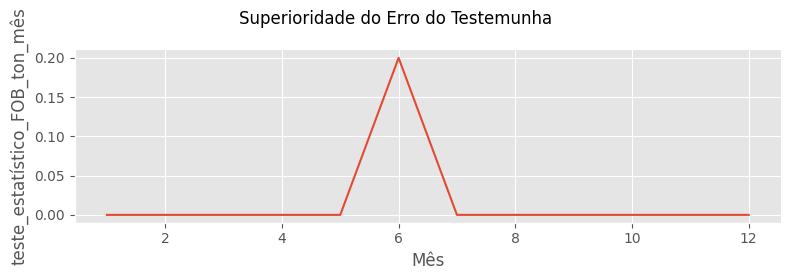

In [11]:
sns.relplot(data=q.groupby('Mês').teste_estatístico_FOB_ton_mês.mean().reset_index(),x='Mês',y='teste_estatístico_FOB_ton_mês',\
            kind='line',height=2.5,aspect=2*1.6)\
.fig.suptitle(title,y=1.1)
plt.show()

In [12]:
print('\
\n\nNo gráfico acima podemos ver a sazonalidade, lembrando uma curva senoide, que se move suavemente\n\
entre a parte alta e baixa do gráfico.\n\n\
Vamos identificar o mês com resultado mais positivo para fazer nele o teste de hipótese proposto.\n\n\
Adicionalmente vamos identificar o mês de resultado mais negativo, para testar também o oposto da hipótese principal,\n\
ou seja, se a inclusão dos dados de chuva nos cálculos pode reduzir a precisão das previsões de importação.')



No gráfico acima podemos ver a sazonalidade, lembrando uma curva senoide, que se move suavemente
entre a parte alta e baixa do gráfico.

Vamos identificar o mês com resultado mais positivo para fazer nele o teste de hipótese proposto.

Adicionalmente vamos identificar o mês de resultado mais negativo, para testar também o oposto da hipótese principal,
ou seja, se a inclusão dos dados de chuva nos cálculos pode reduzir a precisão das previsões de importação.


In [13]:
mes_pos=q.groupby('Mês').teste_estatístico_FOB_ton_mês.mean().reset_index().sort_values('teste_estatístico_FOB_ton_mês').Mês.values[-1]
print(f'\n\nO mês de resultado mais positivo foi o mês {mes_pos}.')



O mês de resultado mais positivo foi o mês 6.


In [14]:
mes_neg=q.groupby('Mês').teste_estatístico_FOB_ton_mês.mean().reset_index().sort_values('teste_estatístico_FOB_ton_mês').Mês.values[0]
print(f'\n\nO mês de resultado mais negativo foi o mês {mes_neg}.')



O mês de resultado mais negativo foi o mês 1.


In [15]:
q_pos=q[q.Mês==mes_pos]

In [16]:
q_neg=q[q.Mês==mes_neg]



Resultados dos testes no mês mais positivo, mês 6:


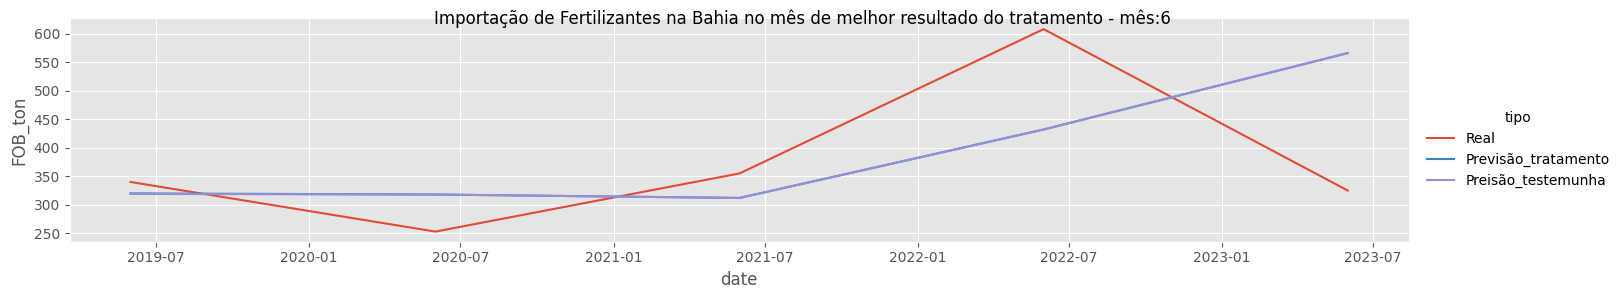



Utilizando a técnica da reamostragem conseguimos visualizar a normalidade da  distribuição dos resultados.


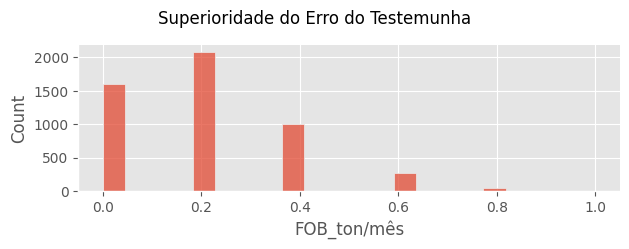

O p_value foi de 0.13.

No mês 6, em média o errou da testemunha ficou 0 FOB_ton maior que o tratamento.
Isso corresponde a 0 % a mais de erro.


Pelo método paramétrico, com significância de 0.05, "fail to reject Ho".


 Porém, visualmente se pode notar anormalidades na curva normal criada. Isso ocorre devido a baixo número de amostras originais.


Pelo método paramétrico de reamostragem, é exigido que se tenham no mínimo 30 amostras originais para se proceder
o teste de hipótese. Neste nosso caso, o número de amostras esta bem abaixo, com apenas 5 amostras, o que **invalida**
a reijeição feita acima.

Nessa situação, a alternativa para proceder o teste de hipóteses são os métodos não paramétricos, como o de Wilcoxon:


,p-val
Wilcoxon,0.5




Por método não paramétrico, com significância de 0.05, "fail to reject Ho".


Enfim, podemos afirmar com significância estatística que levar em conta os dados de chuvas
nas condições aqui determinadas, aumentou a precisão das previsões das importações de fertilizantes.

Vamos aproveitar o conjunto de testes realizados para testar uma nova hipótese, inversa da inicial.

Ho: No mês de resultado mais negativo, mês 1, utilizar os dados de chuva pode reduzir a precisão
da previsão de importação de fertilizantes?


In [17]:
print(f'\n\nResultados dos testes no mês mais positivo, mês {mes_pos}:')

p1=q_pos[['date','FOB_ton']].reset_index(drop=True).assign(tipo='Real')

p2=q_pos[['date','FOB_ton_pred_tratamento']].reset_index(drop=True).assign(tipo='Previsão_tratamento')\
.rename(columns={'FOB_ton_pred_tratamento':'FOB_ton'})

p3=q_pos[['date','FOB_ton_pred_testemunha']].reset_index(drop=True).assign(tipo='Preisão_testemunha')\
.rename(columns={'FOB_ton_pred_testemunha':'FOB_ton'})

q_pos_l=pd.concat([p1,p2,p3]).dropna()

g=sns.relplot(data=q_pos_l,x='date',y='FOB_ton',hue='tipo', kind='line',height=3,aspect=3*1.6)\
.fig.suptitle(f'Importação de Fertilizantes na Bahia no mês de melhor resultado do tratamento - mês:{mes_pos}')
plt.show()

fig=g.get_figure()
fig.savefig('best.png')


print('\n\nUtilizando a técnica da reamostragem conseguimos visualizar a normalidade da  distribuição dos resultados.')

# Step 3. Repeat steps 1 & 2 many times, appending to a list
so_boot_distn = []
for i in range(5000):
    so_boot_distn.append(q_pos.sample(frac=1, replace=True)['teste_estatístico_FOB_ton_mês'].mean())

sns.displot(so_boot_distn,height=2,aspect=2*1.6).fig.suptitle(title,y=1.1)
plt.xlabel('FOB_ton/mês')
plt.show()


m=np.mean(so_boot_distn)
s=np.std(so_boot_distn,ddof=1)

z_score=(0-m)/s

from scipy.stats import norm
p=round(norm.cdf(z_score,loc=0,scale=1),3)
print(f"O p_value foi de {p}.")

erro_tratamento_mean=q_pos.erro_tratamento.mean()

erro_testemunha_mean=q_pos.erro_testemunha.mean()

print(f'\n\
No mês {mes_pos}, em média o errou da testemunha ficou {round(m)} FOB_ton maior que o tratamento.\n\
Isso corresponde a {round(((erro_testemunha_mean-erro_tratamento_mean)/erro_tratamento_mean)*100)} % a mais de erro.')

if p<=alpha:
    print(f'\n\nPelo método paramétrico, com significância de {alpha}, "reject Ho".')
else:
    print(f'\n\nPelo método paramétrico, com significância de {alpha}, "fail to reject Ho".')

print('\n\n Porém, visualmente se pode notar anormalidades na curva normal criada. Isso ocorre devido a baixo número de amostras originais.')

print(f"\n\nPelo método paramétrico de reamostragem, é exigido que se tenham no mínimo 30 amostras originais para se proceder\n\
o teste de hipótese. Neste nosso caso, o número de amostras esta bem abaixo, com apenas {len(q_pos)} amostras, o que **invalida**\n\
a reijeição feita acima.\
\n\nNessa situação, a alternativa para proceder o teste de hipóteses são os métodos não paramétricos, como o de Wilcoxon:")

import pingouin

p_w=pingouin.wilcoxon(
    x=q_pos.erro_tratamento,
    y=q_pos.erro_testemunha,
    alternative='less'
)

display(p_w[['p-val']])

p=p_w['p-val'].values[0]

if p<=alpha:
    print(f'\n\nPor método não paramétrico, com significância de {alpha}, "reject Ho".')
else:
    print(f'\n\nPor método não paramétrico, com significância de {alpha}, "fail to reject Ho".')
    

print(f'\n\nEnfim, podemos afirmar com significância estatística que levar em conta os dados de chuvas\n\
nas condições aqui determinadas, aumentou a precisão das previsões das importações de fertilizantes.\n\n\
Vamos aproveitar o conjunto de testes realizados para testar uma nova hipótese, inversa da inicial.\n\n\
Ho: No mês de resultado mais negativo, mês {mes_neg}, utilizar os dados de chuva pode reduzir a precisão\n\
da previsão de importação de fertilizantes?')



Resultados dos testes no mês mais negativo, mês 1:


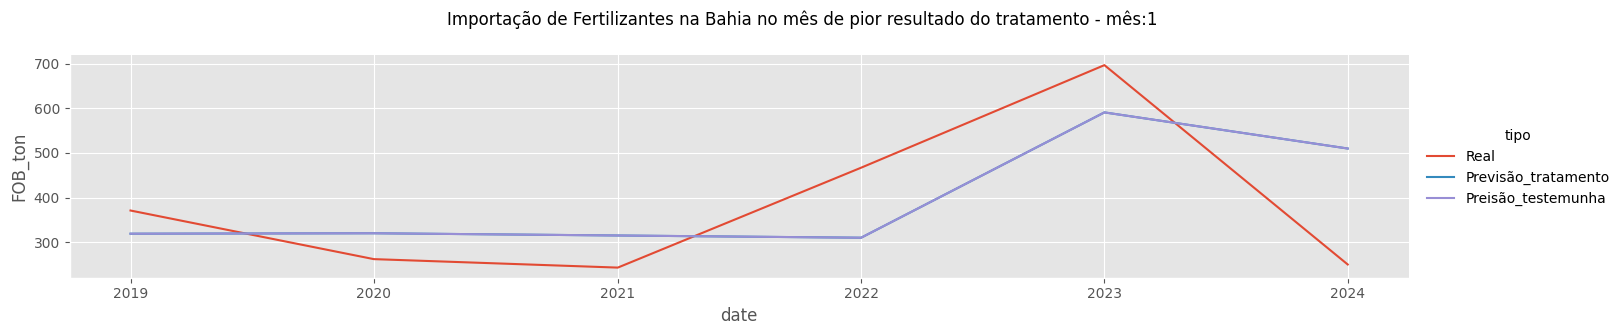



Utilizando a técnica da reamostragem conseguimos visualizar a normalidade da  distribuição dos resultados.


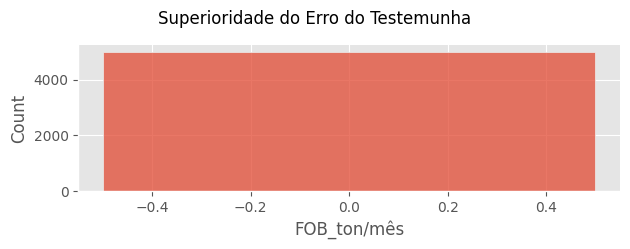

O p_value foi de nan.

No mês 1, em média o errou da testemunha ficou 0 FOB_ton menor que o tratamento.
Isso corresponde a 0 % a menos de erro.


Pelo método paramétrico, com significância de 0.05, "fail to reject Ho".


Porém, pela mesma razão do teste anterior, visualmente se pode notar anormalidades na curva normal criada.
Isso ocorre devido a baixo número de amostras originais.


Pelo método paramétrico de reamostragem, é exigido que se tenham no mínimo 30 amostras originais para se proceder
o teste de hipótese. Neste nosso caso, o número de amostras esta bem abaixo, com apenas 6 amostras, o que **invalida**
a reijeição feita acima.

Nessa situação, a alternativa para proceder o teste de hipóteses são os métodos não paramétricos, como o de Wilcoxon:


ValueError: zero_method 'wilcox' and 'pratt' do not work if x - y is zero for all elements.

In [18]:
print(f'\n\nResultados dos testes no mês mais negativo, mês {mes_neg}:')

p1=q_neg[['date','FOB_ton']].reset_index(drop=True).assign(tipo='Real')

p2=q_neg[['date','FOB_ton_pred_tratamento']].reset_index(drop=True).assign(tipo='Previsão_tratamento')\
.rename(columns={'FOB_ton_pred_tratamento':'FOB_ton'})

p3=q_neg[['date','FOB_ton_pred_testemunha']].reset_index(drop=True).assign(tipo='Preisão_testemunha')\
.rename(columns={'FOB_ton_pred_testemunha':'FOB_ton'})

q_neg_l=pd.concat([p1,p2,p3]).dropna()

sns.relplot(data=q_neg_l,x='date',y='FOB_ton',hue='tipo', kind='line',height=3,aspect=3*1.6)\
.fig.suptitle(f'Importação de Fertilizantes na Bahia no mês de pior resultado do tratamento - mês:{mes_neg}',y=1.1)
plt.show()

print('\n\nUtilizando a técnica da reamostragem conseguimos visualizar a normalidade da  distribuição dos resultados.')

# Step 3. Repeat steps 1 & 2 many times, appending to a list
so_boot_distn = []
for i in range(5000):
    so_boot_distn.append(q_neg.sample(frac=1, replace=True)['teste_estatístico_FOB_ton_mês'].mean())

sns.displot(so_boot_distn,height=2,aspect=2*1.6).fig.suptitle(title,y=1.1)
plt.xlabel('FOB_ton/mês')
plt.show()

m=np.mean(so_boot_distn)
s=np.std(so_boot_distn,ddof=1)

z_score=(0-m)/s

from scipy.stats import norm
p=round(1-norm.cdf(z_score,loc=0,scale=1),3)
print(f"O p_value foi de {p}.")

erro_tratamento_mean=q_neg.erro_tratamento.mean()

erro_testemunha_mean=q_neg.erro_testemunha.mean()

print(f'\n\
No mês {mes_neg}, em média o errou da testemunha ficou {-round(m)} FOB_ton menor que o tratamento.\n\
Isso corresponde a {round(((erro_tratamento_mean-erro_testemunha_mean)/erro_tratamento_mean)*100)} % a menos de erro.')

if p<=alpha:
    print(f'\n\nPelo método paramétrico, com significância de {alpha}, "reject Ho".')
else:
    print(f'\n\nPelo método paramétrico, com significância de {alpha}, "fail to reject Ho".')

print('\n\nPorém, pela mesma razão do teste anterior, visualmente se pode notar anormalidades na curva normal criada.\n\
Isso ocorre devido a baixo número de amostras originais.')

print(f"\n\nPelo método paramétrico de reamostragem, é exigido que se tenham no mínimo 30 amostras originais para se proceder\n\
o teste de hipótese. Neste nosso caso, o número de amostras esta bem abaixo, com apenas {len(q_neg)} amostras, o que **invalida**\n\
a reijeição feita acima.\
\n\nNessa situação, a alternativa para proceder o teste de hipóteses são os métodos não paramétricos, como o de Wilcoxon:")

import pingouin

p_w=pingouin.wilcoxon(
    y=q_neg.erro_tratamento,
    x=q_neg.erro_testemunha,
    alternative='less'
)

display(p_w[['p-val']])

p=p_w['p-val'].values[0]

if p<=alpha:
    print(f'\n\nPor método não paramétrico, com significância de {alpha}, "reject Ho".')
else:
    print(f'\n\nPor método não paramétrico, com significância de {alpha}, "fail to reject Ho".')
    

print(f'\n\nEnfim, NÃO podemos afirmar com significância estatística que levar em conta os dados de chuvas\n\
nas condições aqui determinadas, reduziu a precisão das previsões das importações de fertilizantes.\n\n')

In [ ]:
print('\
\n\nConclusão Final\n\n\
Concatenando as duas conclusões anteriores, sobre utilizar aicionalmente dados de chuva para previsão de importação de fertilizantes:\n\n\
\t* Se pode afirmar com segurança que, ao menos para alguns meses dos ano, a precisão das previsões é aumentada.\n\n\
\t* Não se pode afirmar com segurança que, ao menos para alguns meses dos ano, a precisão das previsões é reduzida.')